In [1]:
import os
import sys
path = '/packages/Lib/site-packages'
sys.path.insert(0, os.getcwd() + path)

In [2]:
from slistener import SListener
import json
import time
import tweepy
import sys

In [3]:
import numpy as np
import pandas as pd

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
consumer_key = 'tbFDqEaP7Am0bWqcqsVs9JyiV'
consumer_secret = 'GaRHsAhLXxaCg6Ms1HpMN1ZNOvNkitdfDKI66yEtGO7PbPoMhx'

access_token =  '86722005-nFCl0hQNYFTjdWPmpe7jh8MKraMaQbFtq8R1c1V6q'
access_token_secret = '9if08KJLrXrfxkLgFtFBZikA4bfvHfryMB5jJUMqPZttz'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api  = tweepy.API(auth)

In [7]:
#for tweet in api.search(['#Election2020','trump','biden']):
#    print(tweet.text)

In [8]:
df = pd.DataFrame(columns= ['Tweets','User','User_location','User_statuses_count','user_followers',
                            'user_verified','fav_count','rt_count','tweet_date'])

In [9]:
def stream(data,file_name):
    i = 0 
    for tweet in tweepy.Cursor(api.search,q=data,count=100,lang='en').items():
        print(i,end='\r')
        df.loc[i,'Tweets'] = tweet.text
        df.loc[i,'User'] = tweet.user.name
        df.loc[i,'User_statuses_count'] = tweet.user.statuses_count 
        df.loc[i,'user_followers'] = tweet.user.followers_count
        df.loc[i,'user_verified'] = tweet.user.verified
        
        df.loc[i,'User_location'] = tweet.user.location
        df.loc[i,'fav_count'] = tweet.favorite_count
        df.loc[i,'rt_count'] = tweet.retweet_count
        df.loc[i,'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i+=1
        if i == 4000:
            break
        else:
            pass
        

In [217]:
#stream(data=['#Election2020','trump','biden'],file_name='my_tweets1')

In [104]:
df.shape

(3535, 12)

In [105]:
df.columns

Index(['Tweets', 'User', 'User_location', 'User_statuses_count',
       'user_followers', 'user_verified', 'fav_count', 'rt_count',
       'tweet_date', 'clean_tweets', 'sentiment_scores', 'Sentiment'],
      dtype='object')

In [106]:
df.head()

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,tweet_date,clean_tweets,sentiment_scores,Sentiment
0,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3,9News Queensland,"Brisbane, Australia",272205,136289,True,0,0,2020-11-03 01:33:08,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
1,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,2020-11-03 01:33:06,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Positive
2,RT @EuropeElects: If Europeans could vote in US Presidential election:\n\nTrump–Biden (%)\n🇷🇺68–32\n🇵🇱50–50\n🇹🇷47–53\n🇭🇺41–59\n🇮🇹23–77 / 47–53\n🇬🇧1…,Blair McDougall,East Renfrewshire,76819,15106,True,0,198,2020-11-03 01:33:02,RT If Europeans could vote in US Presidential election Trump Biden 68 32 50 50 47 53 41 59 23 77 47 53 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
3,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/A7ojHfemH6,9News Gold Coast,"Surfers Paradise, Gold Coast",141043,39002,True,0,0,2020-11-03 01:32:59,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
4,"RT @HKrassenstein: It’s simple:\n\nIf you want a healthy United States of America, vote for Joe Biden.\n\nIf you want a sick Divided States of…",Cheese 🌞⛈️,,19097,1094,False,0,288,2020-11-03 01:32:54,RT It s simple If you want a healthy United States of America vote for Joe Biden If you want a sick Divided States of,"{'neg': 0.116, 'neu': 0.599, 'pos': 0.285, 'compound': 0.4215}",Negative


In [107]:
df1 = df.copy()

In [108]:
tweet_data = df['Tweets']

In [109]:
tweet_data

0                                                                 The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3
1             RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…
2       RT @EuropeElects: If Europeans could vote in US Presidential election:\n\nTrump–Biden (%)\n🇷🇺68–32\n🇵🇱50–50\n🇹🇷47–53\n🇭🇺41–59\n🇮🇹23–77 / 47–53\n🇬🇧1…
3                                                                 The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/A7ojHfemH6
4            RT @HKrassenstein: It’s simple:\n\nIf you want a healthy United States of America, vote for Joe Biden.\n\nIf you want a sick Divided States of…
                                                                                ...                                                                         
3530            RT @w_terrence: Just got off the phone wit

In [110]:
df['Tweets'].head(1)

0    The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3
Name: Tweets, dtype: object

In [111]:
import re
#tweet_data = re.sub(r"http\S+", "", tweet_data)
#text = re.sub(r'^https?:\/\/.[\r\n]', '', text, flags=re.MULTILINE)

In [112]:
#for i in tweet_data:
tweet_1 =  re.sub(r'http\S+', ' ', str(tweet_data),flags=re.MULTILINE)

In [113]:
tweet_1

'0                                                                 The U.S. election is now just a day away.\\n\\n#Election2020 #9News\\n \n1             RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\\n\\nAlso, on MSNBC: “People are nervous for no reason. We’ll…\n2       RT @EuropeElects: If Europeans could vote in US Presidential election:\\n\\nTrump–Biden (%)\\n🇷🇺68–32\\n🇵🇱50–50\\n🇹🇷47–53\\n🇭🇺41–59\\n🇮🇹23–77 / 47–53\\n🇬🇧1…\n3                                                                 The U.S. election is now just a day away.\\n\\n#Election2020 #9News\\n \n4            RT @HKrassenstein: It’s simple:\\n\\nIf you want a healthy United States of America, vote for Joe Biden.\\n\\nIf you want a sick Divided States of…\n                                                                                ...                                                                         \n3530            RT @w_terrence: Just got off the phone with one of my forme

In [114]:
tweet_data = pd.DataFrame(tweet_data)

In [115]:
tweet_data

,Tweets
0,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3
1,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…"
2,RT @EuropeElects: If Europeans could vote in US Presidential election:\n\nTrump–Biden (%)\n🇷🇺68–32\n🇵🇱50–50\n🇹🇷47–53\n🇭🇺41–59\n🇮🇹23–77 / 47–53\n🇬🇧1…
3,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/A7ojHfemH6
4,"RT @HKrassenstein: It’s simple:\n\nIf you want a healthy United States of America, vote for Joe Biden.\n\nIf you want a sick Divided States of…"
...,...
3530,"RT @w_terrence: Just got off the phone with one of my former foster brothers and he’s a registered Democrat. He said ""As far as I know Bide…"
3531,"RT @w_terrence: Just got off the phone with one of my former foster brothers and he’s a registered Democrat. He said ""As far as I know Bide…"
3532,"RT @w_terrence: Just got off the phone with one of my former foster brothers and he’s a registered Democrat. He said ""As far as I know Bide…"
3533,"RT @w_terrence: Just got off the phone with one of my former foster brothers and he’s a registered Democrat. He said ""As far as I know Bide…"


In [116]:
def clean_tweet(tweet): 
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [117]:
#tweet

In [118]:
df['clean_tweets'] = df['Tweets'].apply(lambda x: clean_tweet(x))

In [119]:
#df['clean_tweets']

In [120]:
df.head(20)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,tweet_date,clean_tweets,sentiment_scores,Sentiment
0,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3,9News Queensland,"Brisbane, Australia",272205,136289,True,0,0,2020-11-03 01:33:08,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
1,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,2020-11-03 01:33:06,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Positive
2,RT @EuropeElects: If Europeans could vote in US Presidential election:\n\nTrump–Biden (%)\n🇷🇺68–32\n🇵🇱50–50\n🇹🇷47–53\n🇭🇺41–59\n🇮🇹23–77 / 47–53\n🇬🇧1…,Blair McDougall,East Renfrewshire,76819,15106,True,0,198,2020-11-03 01:33:02,RT If Europeans could vote in US Presidential election Trump Biden 68 32 50 50 47 53 41 59 23 77 47 53 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
3,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/A7ojHfemH6,9News Gold Coast,"Surfers Paradise, Gold Coast",141043,39002,True,0,0,2020-11-03 01:32:59,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
4,"RT @HKrassenstein: It’s simple:\n\nIf you want a healthy United States of America, vote for Joe Biden.\n\nIf you want a sick Divided States of…",Cheese 🌞⛈️,,19097,1094,False,0,288,2020-11-03 01:32:54,RT It s simple If you want a healthy United States of America vote for Joe Biden If you want a sick Divided States of,"{'neg': 0.116, 'neu': 0.599, 'pos': 0.285, 'compound': 0.4215}",Negative
5,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",STAN BTS,Twitter World,2673,72,False,0,260,2020-11-03 01:32:54,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Positive
6,"RT @thenewsoncnbc: The credibility of the U.S. is “absolutely” on the line with #Election2020, presidential historian @BeschlossDC says. He…",Susan Cox,"Cambridge, MA",44907,437,False,0,8,2020-11-03 01:32:53,RT The credibility of the U S is absolutely on the line with Election2020 presidential historian says He,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
7,"RT @w_terrence: Just got off the phone with one of my former foster brothers and he’s a registered Democrat. He said ""As far as I know Bide…",Mark Albrecht,,34717,137,False,0,2176,2020-11-03 01:32:51,RT terrence Just got off the phone with one of my former foster brothers and he s a registered Democrat He said As far as I know Bide,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
8,"RT @w_terrence: Just got off the phone with one of my former foster brothers and he’s a registered Democrat. He said ""As far as I know Bide…",Sandra Odom,,1737,178,False,0,2176,2020-11-03 01:32:49,RT terrence Just got off the phone with one of my former foster brothers and he s a registered Democrat He said As far as I know Bide,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Positive
9,"RT @PeteKent01: If #Trump breaking through the #BlueWall was the story in '16, his breaking through the Black/Brown Wall looms as the story…",CindyProAmerica,,97023,25825,False,0,4,2020-11-03 01:32:47,RT If Trump breaking through the BlueWall was the story in 16 his breaking through the Black Brown Wall looms as the story,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'compound': -0.1531}",Negative


In [121]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
print(df['tweet_date'])

0      2020-11-03 01:33:08
1      2020-11-03 01:33:06
2      2020-11-03 01:33:02
3      2020-11-03 01:32:59
4      2020-11-03 01:32:54
               ...        
3530   2020-11-02 20:54:16
3531   2020-11-02 20:54:11
3532   2020-11-02 20:54:10
3533   2020-11-02 20:54:07
3534   2020-11-02 20:54:05
Name: tweet_date, Length: 3535, dtype: datetime64[ns]


In [122]:
df_indexed = df.copy()

In [123]:
df_indexed = df_indexed.set_index('tweet_date')

In [124]:
#from flatten_tweets import flatten_tweets, check_word_in_tweet

In [126]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['clean_tweets'].str.contains(word, case = False)
    return contains_column

In [127]:
df_indexed['biden'] = check_word_in_tweet('biden', df_indexed)
print(df_indexed['biden'])

tweet_date
2020-11-03 01:33:08    False
2020-11-03 01:33:06    False
2020-11-03 01:33:02     True
2020-11-03 01:32:59    False
2020-11-03 01:32:54     True
                       ...  
2020-11-02 20:54:16    False
2020-11-02 20:54:11    False
2020-11-02 20:54:10    False
2020-11-02 20:54:07    False
2020-11-02 20:54:05    False
Name: biden, Length: 3535, dtype: bool


In [128]:
print(np.sum(df_indexed['biden']))

1760


In [129]:
df_indexed['trump'] = check_word_in_tweet('trump', df_indexed)
print(df_indexed['trump'])

tweet_date
2020-11-03 01:33:08    False
2020-11-03 01:33:06     True
2020-11-03 01:33:02     True
2020-11-03 01:32:59    False
2020-11-03 01:32:54    False
                       ...  
2020-11-02 20:54:16    False
2020-11-02 20:54:11    False
2020-11-02 20:54:10    False
2020-11-02 20:54:07    False
2020-11-02 20:54:05    False
Name: trump, Length: 3535, dtype: bool


In [130]:
print(np.sum(df_indexed['trump']))

2070


In [131]:
mean_biden = df_indexed['biden'].resample('1 H').mean()
print(mean_biden)

tweet_date
2020-11-02 20:00:00    0.208054
2020-11-02 21:00:00    0.384615
2020-11-02 22:00:00    0.544952
2020-11-02 23:00:00    0.524297
2020-11-03 00:00:00    0.550898
2020-11-03 01:00:00    0.622047
Freq: H, Name: biden, dtype: float64


In [132]:
mean_trump = df_indexed['trump'].resample('1 H').mean()
print(mean_trump)

tweet_date
2020-11-02 20:00:00    0.248322
2020-11-02 21:00:00    0.412260
2020-11-02 22:00:00    0.546335
2020-11-02 23:00:00    0.694373
2020-11-03 00:00:00    0.709581
2020-11-03 01:00:00    0.729659
Freq: H, Name: trump, dtype: float64


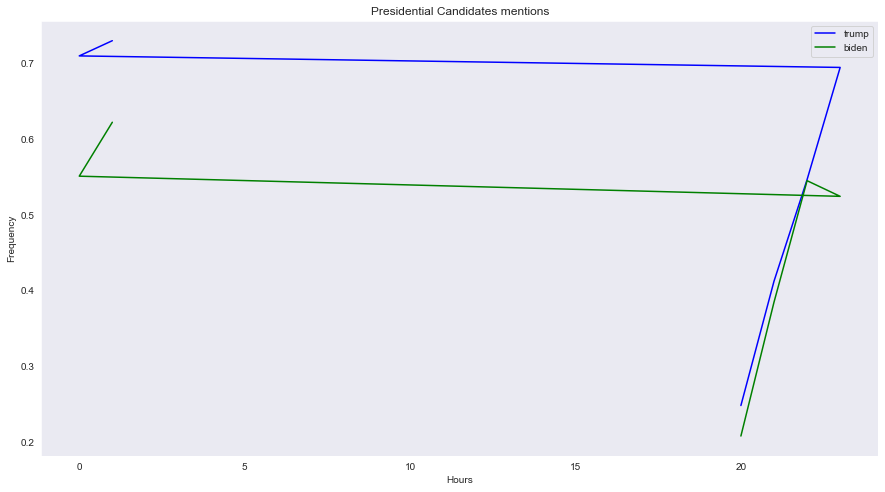

In [211]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(mean_trump.index.hour,mean_trump, color = 'blue')
plt.plot(mean_biden.index.hour,mean_biden, color = 'green')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Presidential Candidates mentions')
plt.legend(('trump', 'biden'))
plt.show()

In [214]:
import warnings
warnings.filterwarnings('ignore')

In [216]:
import nltk
#nltk.download('vader_lexicon')

In [135]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


In [136]:
df['sentiment_scores'] = df['clean_tweets'].apply(sid.polarity_scores)

In [45]:
pos = df['clean_tweets'].apply(sid.polarity_scores)

In [137]:

for message in df['clean_tweets']:
    scores = sid.polarity_scores(message)

    for key in sorted(scores):
        print('{0}: {1} '.format(key, scores[key]), end='')

    if scores["compound"] >= 0.05:
        print("\npositive\n")

    elif scores["compound"] <= -0.05:
        print("\nnegative\n")
    else:
        print("\nneutral\n")

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.7783 neg: 0.281 neu: 0.719 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4215 neg: 0.116 neu: 0.599 pos: 0.285 
positive

compound: -0.7783 neg: 0.281 neu: 0.719 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.1531 neg: 0.068 neu: 0.932 pos: 0.0 
negative

compound: -0.3182 neg: 0.195 neu: 0.692 pos: 0.113 
negative

compound: 0.128 neg: 0.091 neu: 0.798 pos: 0.11 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.2263 neg: 0.0 neu: 0.909 pos: 0.091 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4939 neg: 0.0 neu: 0.802 pos: 0.198 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4215 neg: 0.116 neu: 0.599 pos: 0.285 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.0516 neg: 0.144 neu: 0.72 pos: 0.136 
negative

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4215 neg: 0.0 neu: 0.872 pos: 0.128 
positive

compound: -0.2732 neg: 0.14 neu: 0.86 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.2732 neg: 0.

compound: -0.7783 neg: 0.281 neu: 0.719 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.6633 neg: 0.189 neu: 0.811 pos: 0.0 
negative

compound: 0.4215 neg: 0.0 neu: 0.851 pos: 0.149 
positive

compound: 0.8402 neg: 0.0 neu: 0.643 pos: 0.357 
positive

compound: 0.4215 neg: 0.0 neu: 0.843 pos: 0.157 
positive

compound: -0.296 neg: 0.121 neu: 0.879 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.774 pos: 0.226 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.7783 neg: 0.281 neu: 0.719 pos: 0.0 
negative

compound: -0.2023 neg: 0.128 neu: 0.872 pos: 0.0 
negative

compound: 0.4215 neg: 0.0 neu: 0.843 pos: 0.157 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
n


compound: 0.5859 neg: 0.0 neu: 0.743 pos: 0.257 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0772 neg: 0.0 neu: 0.925 pos: 0.075 
positive

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: -0.7783 neg: 0.281 neu: 0.719 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.8225 neg: 0.0 neu: 0.678 pos: 0.322 
positive

compound: -0.7783 neg: 0.281 neu: 0.719 pos: 0.0 
negative

compound: -0.4215 neg: 0.135 neu: 0.865 pos: 0.0 
negative

compound: -0.7783 neg: 0.281 neu: 0.719 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4915 neg: 0.0 neu: 0.802 pos: 0.198 
positive

compound: 0.7739 neg: 0.0 neu: 0.62 pos: 0.38 
positive

compound: 0.4215 neg: 0.0 neu: 0.872 pos: 0.128 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4215 neg: 0.0 neu: 0.847 pos: 0.153 
positive

compound: 0.0 neg: 0.0 neu: 1.

compound: -0.5423 neg: 0.149 neu: 0.851 pos: 0.0 
negative

compound: -0.3182 neg: 0.087 neu: 0.913 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.128 neg: 0.091 neu: 0.798 pos: 0.11 
positive

compound: 0.4215 neg: 0.0 neu: 0.872 pos: 0.128 
positive

compound: 0.4939 neg: 0.0 neu: 0.856 pos: 0.144 
positive

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.5473 neg: 0.0 neu: 0.836 pos: 0.164 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4215 neg: 0.0 neu: 0.872 pos: 0.128 
positive

compound: 0.128 neg: 0.091 neu: 0.798 pos: 0.11 
positive

compound: -0.1531 neg: 0.138 neu: 0.862 pos: 0.0 
negative

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.84 pos:

compound: 0.7925 neg: 0.0 neu: 0.63 pos: 0.37 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.3182 neg: 0.087 neu: 0.913 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.128 neg: 0.091 neu: 0.798 pos: 0.11 
positive

compound: 0.4215 neg: 0.0 neu: 0.859 pos: 0.141 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4939 neg: 0.0 neu: 0.652 pos: 0.348 
positive

compound: 0.2263 neg: 0.0 neu: 0.917 pos: 0.083 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.808 pos: 0.192 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.678 pos: 0.322 
positive

compound: 0.6747 neg: 0.0 neu: 0.743 pos: 0.257 
positive

compound: 0.25 neg: 0.0 neu: 0.909 pos: 0.091 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive


compound: 0.2732 neg: 0.0 neu: 0.861 pos: 0.139 
positive

compound: 0.4404 neg: 0.0 neu: 0.828 pos: 0.172 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.4404 neg: 0.186 neu: 0.745 pos: 0.068 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.1027 neg: 0.0 neu: 0.92 pos: 0.08 
positive

compound: -0.34 neg: 0.124 neu: 0.876 pos: 0.0 
negative

compound: -0.5423 neg: 0.226 neu: 0.774 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.759 pos: 0.241 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: -0.3182 neg: 0.087 neu: 0.913 pos: 0.0 
negative

compound: 0.5859

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5473 neg: 0.0 neu: 0.836 pos: 0.164 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0422 neg: 0.152 neu: 0.689 pos: 0.159 
neutral

compound: 0.2263 neg: 0.0 neu: 0.899 pos: 0.101 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.9158 neg: 0.0 neu: 0.555 pos: 0.445 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.3612 neg: 0.0 neu: 0.615 pos: 0.385 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.2263 neg: 0.0 neu: 0.917 pos: 0.083 
positive

compound: 0.7096 neg: 0.0 neu: 0.718 pos: 0.282 
positive

compound: 0.3626 neg: 0.0 neu: 0.871 pos: 0.129 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0

compound: 0.0 neg: 0.071 neu: 0.857 pos: 0.071 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4215 neg: 0.0 neu: 0.872 pos: 0.128 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.2263 neg: 0.0 neu: 0.913 pos: 0.087 
positive

compound: 0.5859 neg: 0.0 neu: 0.84 pos: 0.16 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.4215 neg: 0.116 neu: 0.599 pos: 0.285 
positive

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0772 neg: 0.119 neu: 0.746 pos: 0.134 
positive

compound: -0.8979 neg: 0.405 neu: 0.595 pos: 0.0 
negative

compound: 0.0 neg: 0.0 neu: 1.0 pos: 0.0 
neutral

compound: 0.0 neg: 0.0 ne

In [139]:
from textblob import TextBlob 
from wordcloud import WordCloud, STOPWORDS 
import chart_studio.plotly as py

In [140]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet) 
    if analysis.sentiment.polarity >= 0.05:
        return 'Positive' 
    elif analysis.sentiment.polarity <=-0.05:
        return 'Negative'
    else: 
        return 'Neutral'   
#Now let's create our new columns: 
#df['clean_tweets'] = df['Tweets'].apply(lambda x: clean_tweet(x)) 
df['Sentiment'] = df['clean_tweets'].apply(lambda x: analyze_sentiment(x))

In [142]:
df['Sentiment']

0        Neutral
1        Neutral
2        Neutral
3        Neutral
4       Negative
          ...   
3530    Positive
3531    Positive
3532    Positive
3533    Positive
3534    Positive
Name: Sentiment, Length: 3535, dtype: object

In [191]:
df.head(2)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,tweet_date,clean_tweets,sentiment_scores,Sentiment
0,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3,9News Queensland,"Brisbane, Australia",272205,136289,True,0,0,2020-11-03 01:33:08,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
1,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,2020-11-03 01:33:06,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Neutral


In [144]:
df_indexed['biden'] = df_indexed['biden'].astype(int)


In [147]:
df_indexed['trump'] = df_indexed['trump'].astype(int) 

In [148]:
df['Sentiment'].value_counts()

Positive    1950
Neutral     1340
Negative     245
Name: Sentiment, dtype: int64

In [190]:
df.head(2)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,tweet_date,clean_tweets,sentiment_scores,Sentiment
0,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3,9News Queensland,"Brisbane, Australia",272205,136289,True,0,0,2020-11-03 01:33:08,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
1,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,2020-11-03 01:33:06,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Neutral


In [150]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [151]:
import plotly.express as px
fig = px.scatter(df, x="User_statuses_count", y="user_followers",
                 color="user_verified",
                 log_x=True,log_y=True,
                 title= "Number of statuses vs number of followers"
                
                )
fig.update_layout(title_x=0.5)
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.show()

In [189]:
df_indexed.head(2)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,clean_tweets,sentiment_scores,Sentiment,biden,trump
tweet_date,,,,,,,,,,,,,
2020-11-03 01:33:08,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3,9News Queensland,"Brisbane, Australia",272205,136289,True,0,0,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,0,0
2020-11-03 01:33:06,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Neutral,0,1


In [153]:
df_indexed['Sentiment'] = df_indexed['clean_tweets'].apply(lambda x: analyze_sentiment(x))

In [188]:
df_indexed.head(2)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,clean_tweets,sentiment_scores,Sentiment,biden,trump
tweet_date,,,,,,,,,,,,,
2020-11-03 01:33:08,The U.S. election is now just a day away.\n\n#Election2020 #9News\nhttps://t.co/zPG8gfk6t3,9News Queensland,"Brisbane, Australia",272205,136289,True,0,0,The U S election is now just a day away Election2020 9News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,0,0
2020-11-03 01:33:06,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Neutral,0,1


In [155]:
biden_df = df_indexed[df_indexed['biden']==1]

In [187]:
biden_df.head(2)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,clean_tweets,sentiment_scores,Sentiment,biden,trump
tweet_date,,,,,,,,,,,,,
2020-11-03 01:33:02,RT @EuropeElects: If Europeans could vote in US Presidential election:\n\nTrump–Biden (%)\n🇷🇺68–32\n🇵🇱50–50\n🇹🇷47–53\n🇭🇺41–59\n🇮🇹23–77 / 47–53\n🇬🇧1…,Blair McDougall,East Renfrewshire,76819,15106,True,0,198,RT If Europeans could vote in US Presidential election Trump Biden 68 32 50 50 47 53 41 59 23 77 47 53 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,1,1
2020-11-03 01:32:54,"RT @HKrassenstein: It’s simple:\n\nIf you want a healthy United States of America, vote for Joe Biden.\n\nIf you want a sick Divided States of…",Cheese 🌞⛈️,,19097,1094,False,0,288,RT It s simple If you want a healthy United States of America vote for Joe Biden If you want a sick Divided States of,"{'neg': 0.116, 'neu': 0.599, 'pos': 0.285, 'compound': 0.4215}",Negative,1,0


In [157]:
trump_df = df_indexed[df_indexed['trump']==1]

In [186]:
trump_df.head(2)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,clean_tweets,sentiment_scores,Sentiment,biden,trump
tweet_date,,,,,,,,,,,,,
2020-11-03 01:33:06,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Neutral,0,1
2020-11-03 01:33:02,RT @EuropeElects: If Europeans could vote in US Presidential election:\n\nTrump–Biden (%)\n🇷🇺68–32\n🇵🇱50–50\n🇹🇷47–53\n🇭🇺41–59\n🇮🇹23–77 / 47–53\n🇬🇧1…,Blair McDougall,East Renfrewshire,76819,15106,True,0,198,RT If Europeans could vote in US Presidential election Trump Biden 68 32 50 50 47 53 41 59 23 77 47 53 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,1,1


In [159]:
total_tweets = ' '.join(tweet for tweet in df['clean_tweets'])

In [160]:
total_tweets

'The U S election is now just a day away Election2020 9News RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll RT If Europeans could vote in US Presidential election Trump Biden 68 32 50 50 47 53 41 59 23 77 47 53 1 The U S election is now just a day away Election2020 9News RT It s simple If you want a healthy United States of America vote for Joe Biden If you want a sick Divided States of RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll RT The credibility of the U S is absolutely on the line with Election2020 presidential historian says He RT terrence Just got off the phone with one of my former foster brothers and he s a registered Democrat He said As far as I know Bide RT terrence Just got off the phone with one of my former foster brothers and he s a registered Democrat He said As far as I know Bide RT If Trump breaking through the BlueWall was the story in 16

In [161]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["RT","Will","will"])


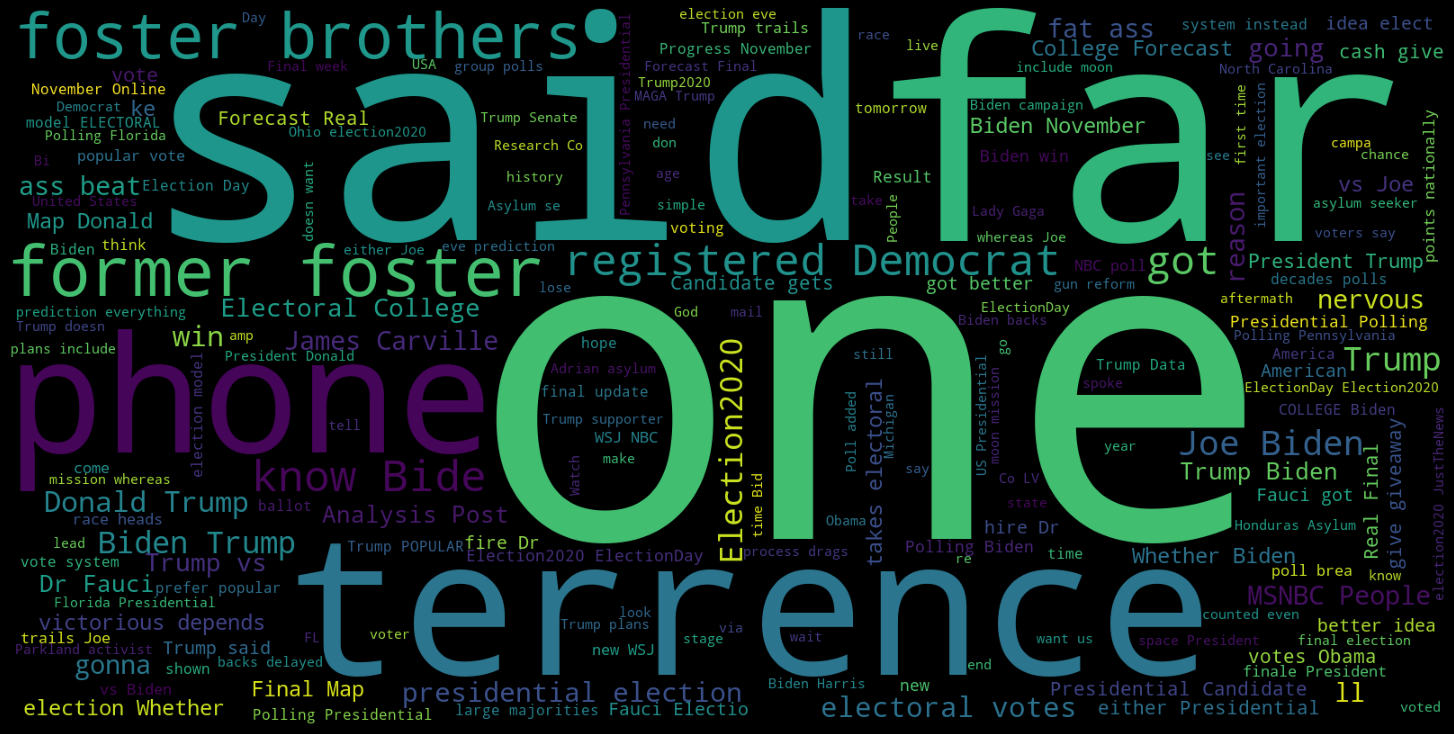

In [162]:
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords).generate(total_tweets)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

plt.show()

In [163]:
import collections

In [164]:
filtered_words = [word for word in total_tweets.split() if word not in stopwords]


In [165]:
wordx = []
for i in filtered_words: 

    if i == "votes":
        i = "vote"
        wordx.append(i)
        
    if ((len(i)>3)  or (i == "Joe")):
        wordx.append(i)
        
print(wordx)
    

['election', 'away', 'Election2020', '9News', 'James', 'Carville', 'Trump', 'gonna', 'beat', 'Also', 'MSNBC', 'People', 'nervous', 'reason', 'Europeans', 'vote', 'Presidential', 'election', 'Trump', 'Biden', 'election', 'away', 'Election2020', '9News', 'simple', 'want', 'healthy', 'United', 'States', 'America', 'vote', 'Joe', 'Biden', 'want', 'sick', 'Divided', 'States', 'James', 'Carville', 'Trump', 'gonna', 'beat', 'Also', 'MSNBC', 'People', 'nervous', 'reason', 'credibility', 'absolutely', 'line', 'Election2020', 'presidential', 'historian', 'says', 'terrence', 'Just', 'phone', 'former', 'foster', 'brothers', 'registered', 'Democrat', 'said', 'know', 'Bide', 'terrence', 'Just', 'phone', 'former', 'foster', 'brothers', 'registered', 'Democrat', 'said', 'know', 'Bide', 'Trump', 'breaking', 'BlueWall', 'story', 'breaking', 'Black', 'Brown', 'Wall', 'looms', 'story', 'Trump', 'still', 'They', 'playing', 'audio', 'attack', 'Biden', 'Election2020', 'Biden', 'Trump', 'said', 'going', 'fire

In [203]:
counted_words = collections.Counter(wordx)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

<BarContainer object of 20 artists>

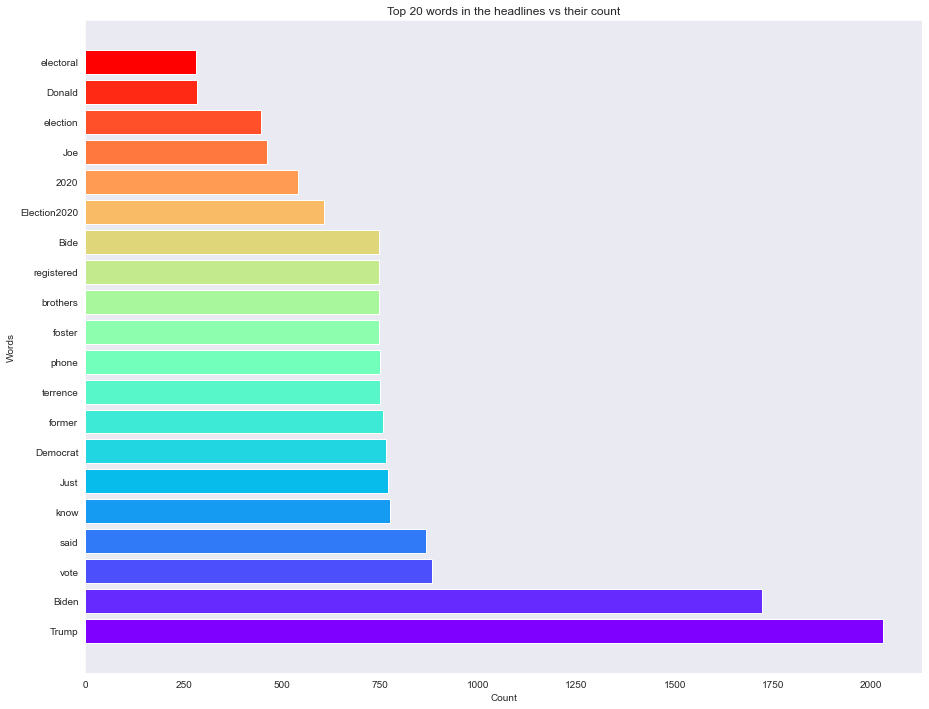

In [210]:
import matplotlib.cm as cm
from matplotlib import rcParams

colors = cm.rainbow(np.linspace(0, 1, len(counts)))
rcParams['figure.figsize'] = 15, 12

plt.title('Top 20 words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [168]:
popular_df = df[df['rt_count']>=100]

In [185]:
popular_df.head(2)

,Tweets,User,User_location,User_statuses_count,user_followers,user_verified,fav_count,rt_count,tweet_date,clean_tweets,sentiment_scores,Sentiment
1,"RT @AynRandPaulRyan: James Carville on Trump: “He’s gonna get his fat ass beat” 🔥\n\nAlso, on MSNBC: “People are nervous for no reason. We’ll…",William Black,,12853,232,False,0,260,2020-11-03 01:33:06,RT James Carville on Trump He s gonna get his fat ass beat Also on MSNBC People are nervous for no reason We ll,"{'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.7783}",Neutral
2,RT @EuropeElects: If Europeans could vote in US Presidential election:\n\nTrump–Biden (%)\n🇷🇺68–32\n🇵🇱50–50\n🇹🇷47–53\n🇭🇺41–59\n🇮🇹23–77 / 47–53\n🇬🇧1…,Blair McDougall,East Renfrewshire,76819,15106,True,0,198,2020-11-03 01:33:02,RT If Europeans could vote in US Presidential election Trump Biden 68 32 50 50 47 53 41 59 23 77 47 53 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral


In [170]:
total_biden = ' '.join(tweet for tweet in biden_df['clean_tweets'])

In [171]:
total_trump = ' '.join(tweet for tweet in trump_df['clean_tweets'])

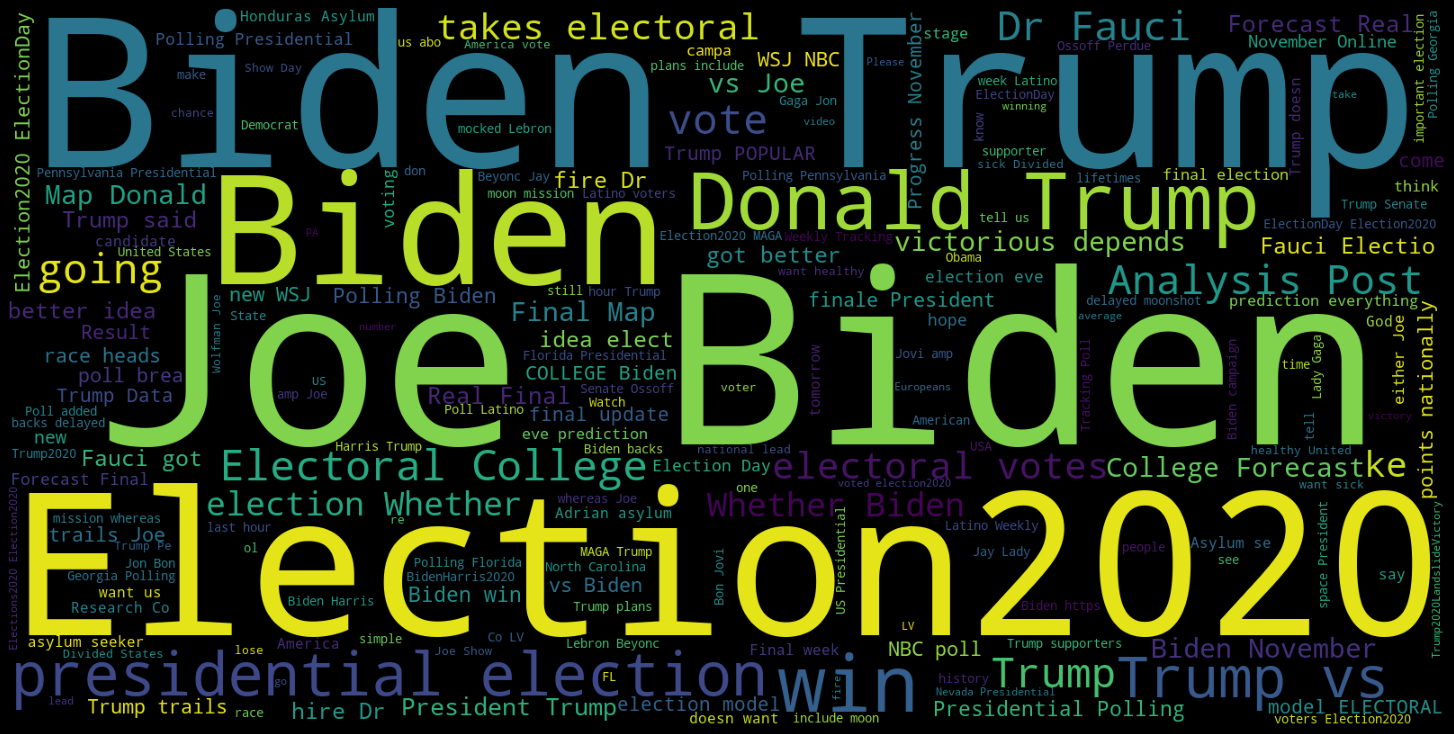

In [182]:
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords).generate(total_biden)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('biden.png', facecolor='k', bbox_inches='tight')

plt.show()

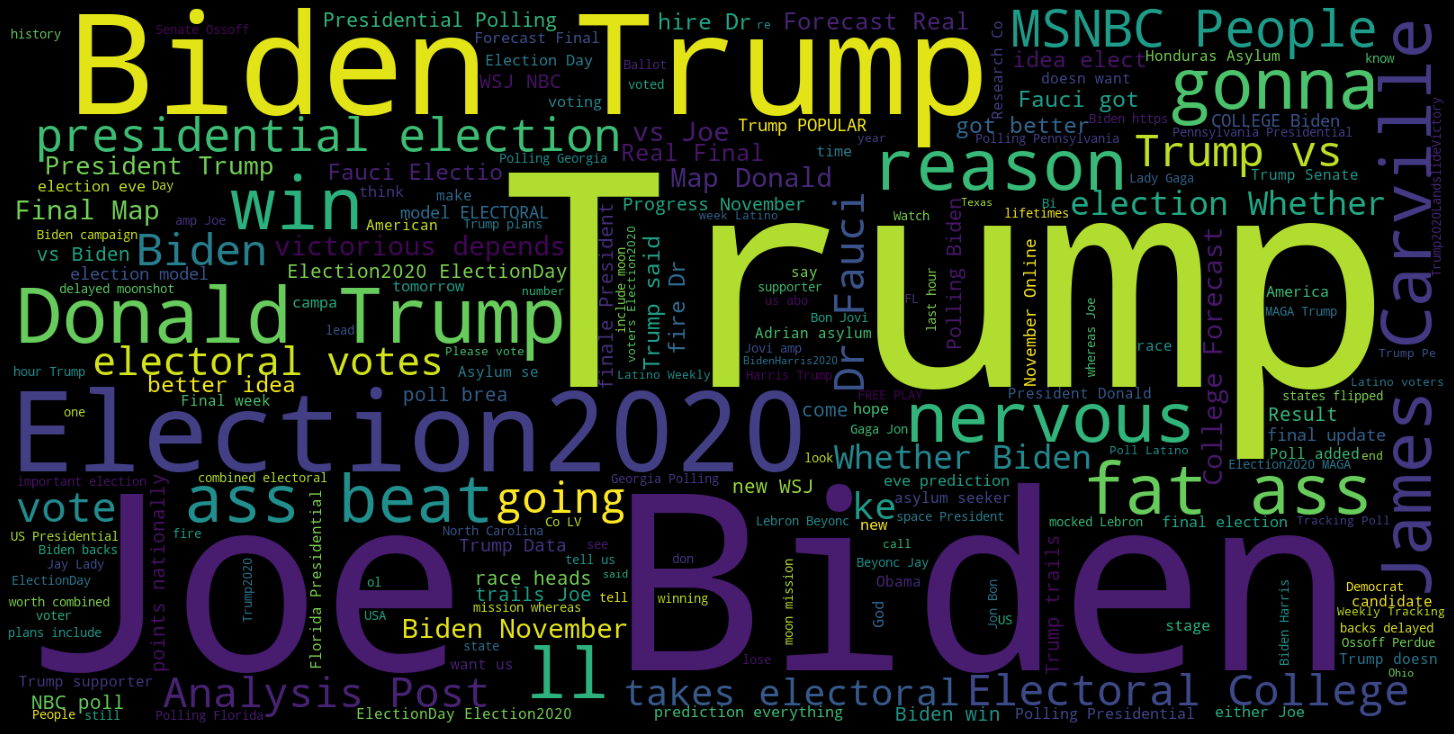

In [183]:
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords).generate(total_trump)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('trump.png', facecolor='k', bbox_inches='tight')

plt.show()

In [173]:
location = popular_df["User_location"].str.split(",",n= 1,expand = True)

In [174]:
location.dropna(inplace = True)

In [175]:
location

,0,1
28,Staten Island,NY
35,Houston,TX
37,Toronto,Ontario
39,New Orleans,LA
50,Houston,TX
...,...,...
3519,Washington,USA
3521,Kansas,USA
3522,Franklin,TN
3531,Illinois,USA


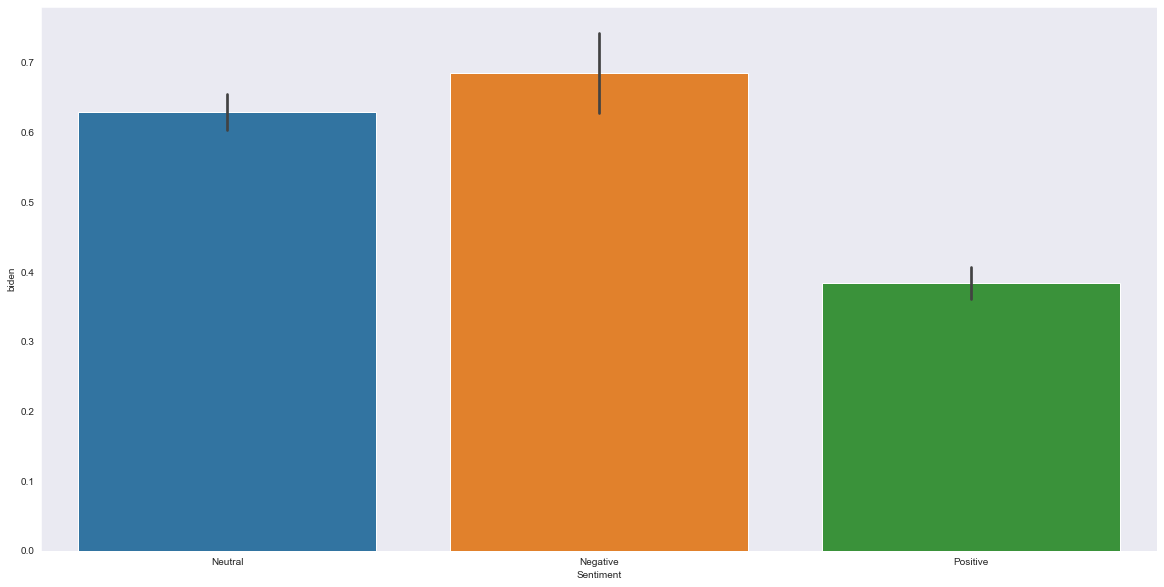

In [180]:
import seaborn as sns
sns.set_style("dark")
ax = sns.barplot(y="biden", x="Sentiment", data=df_indexed)

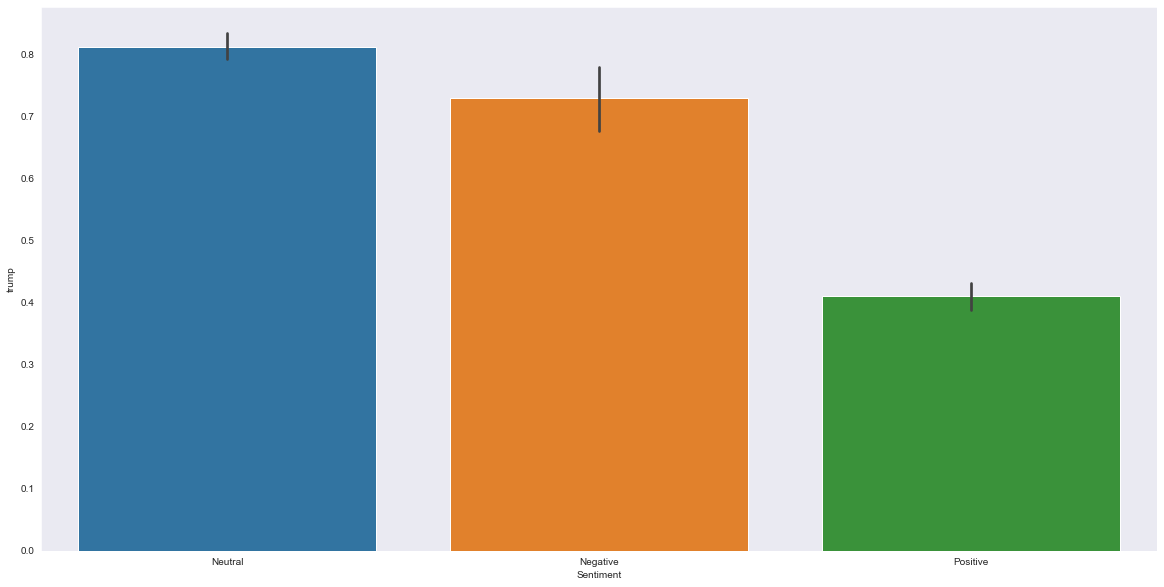

In [181]:
import seaborn as sns
sns.set_style("dark")
ax = sns.barplot(y="trump", x="Sentiment", data=df_indexed)